## Importing Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
c1 = Sequential()

Here we are using a convolutional layer with 32 feature detectors having number of rows and column of those feature detector as 3.

The input shape of image is (32,32).

Here we are using 'relu' as our activation function to make sure that we do not have any negative pixel values in our feature map. It's important to remove those negative pixel values in order to have non-linearity on our dataset, since classification of images is a non-linear problem.

In [3]:
c1.add(Convolution2D(32,3,3, input_shape = (32,32,3),activation = 'relu'))

<ipython-input-3-d87c4aaf60ae>:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  c1.add(Convolution2D(32,3,3, input_shape = (32,32,3),activation = 'relu'))


Adding the first Pooling layer

In [4]:
c1.add(MaxPooling2D(pool_size = (2,2)))

Adding second Col=nvolutional Layer

In [5]:
c1.add(Convolution2D(32,3,3,activation = 'relu'))

<ipython-input-5-7da7ec27f68f>:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  c1.add(Convolution2D(32,3,3,activation = 'relu'))


In [6]:
c1.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
c1.add(Flatten())

In [8]:
c1.add(Dense(output_dim = 128,activation = 'relu'))
c1.add(Dense(output_dim = 1,activation = 'sigmoid'))

<ipython-input-8-f36c96fd7673>:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  c1.add(Dense(output_dim = 128,activation = 'relu'))
<ipython-input-8-f36c96fd7673>:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  c1.add(Dense(output_dim = 1,activation = 'sigmoid'))


In [9]:
c1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Image Augmentation

It's a technique that allows us to enrich our dataset without adding more images and therefore allow us to get good performance with little or no overfitting, even with small amount of dataset.

It creates more images from our training set by streching,tilting,rotating and etc. the current images from our dataset to create more new images, thereby increasing train data witout adding new images from external sources.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('TRAIN',
                                                target_size = (32,32),
                                                batch_size = 32,
                                                class_mode = 'binary')
test_set = test_datagen.flow_from_directory('TEST',
                                           target_size = (32,32),
                                           batch_size = 32,
                                           class_mode = 'binary')
c1.fit_generator(training_set ,
                samples_per_epoch = 148,
                nb_epoch = 25,
                validation_data = test_set,
                nb_val_samples = 40)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


<ipython-input-10-8a0146847661>:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  c1.fit_generator(training_set ,
<ipython-input-10-8a0146847661>:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=4, epochs=25, validation_steps=40)`
  c1.fit_generator(training_set ,


Epoch 1/25
3/4 [=====================>........] - ETA: 1s - loss: 0.7234 - accuracy: 0.5104

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/keras/utils/data_utils.py:613: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  warnings.warn(


4/4 [==============================] - 327s 82s/step - loss: 0.7138 - accuracy: 0.4766 - val_loss: 0.6182 - val_accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 37s 9s/step - loss: 0.6912 - accuracy: 0.4327 - val_loss: 0.6702 - val_accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 64s 16s/step - loss: 0.6574 - accuracy: 0.5603 - val_loss: 0.7108 - val_accuracy: 0.5750
Epoch 4/25
4/4 [==============================] - 35s 9s/step - loss: 0.6417 - accuracy: 0.6406 - val_loss: 0.5838 - val_accuracy: 0.9750
Epoch 5/25
4/4 [==============================] - 34s 9s/step - loss: 0.5990 - accuracy: 0.8621 - val_loss: 0.4949 - val_accuracy: 0.9750
Epoch 6/25
4/4 [==============================] - 34s 8s/step - loss: 0.5524 - accuracy: 0.9052 - val_loss: 0.4686 - val_accuracy: 0.9750
Epoch 7/25
4/4 [==============================] - 336s 84s/step - loss: 0.4840 - accuracy: 0.8516 - val_loss: 0.3990 - val_accuracy: 0.9750
Epoch 8/25
4/4 [========================

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/keras/utils/data_utils.py:613: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  warnings.warn(


4/4 [==============================] - 148s 37s/step - loss: 0.2901 - accuracy: 0.9062 - val_loss: 0.1132 - val_accuracy: 0.9500
Epoch 11/25
4/4 [==============================] - 34s 9s/step - loss: 0.2270 - accuracy: 0.9310 - val_loss: 0.1058 - val_accuracy: 0.9500
Epoch 12/25
4/4 [==============================] - 176s 44s/step - loss: 0.2565 - accuracy: 0.9052 - val_loss: 0.0265 - val_accuracy: 0.9500
Epoch 13/25
4/4 [==============================] - 36s 9s/step - loss: 0.2775 - accuracy: 0.8906 - val_loss: 0.1779 - val_accuracy: 0.9500
Epoch 14/25
4/4 [==============================] - 124s 31s/step - loss: 0.2070 - accuracy: 0.9138 - val_loss: 0.0264 - val_accuracy: 0.9500
Epoch 15/25
4/4 [==============================] - 34s 9s/step - loss: 0.2601 - accuracy: 0.9052 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 16/25
4/4 [==============================] - 209s 52s/step - loss: 0.2132 - accuracy: 0.9138 - val_loss: 0.1261 - val_accuracy: 0.9500
Epoch 17/25
4/4 [==============

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/keras/utils/data_utils.py:613: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  warnings.warn(


4/4 [==============================] - 377s 94s/step - loss: 0.2355 - accuracy: 0.9297 - val_loss: 0.1091 - val_accuracy: 0.9750
Epoch 19/25
4/4 [==============================] - 34s 9s/step - loss: 0.1408 - accuracy: 0.9397 - val_loss: 0.0131 - val_accuracy: 0.9500
Epoch 20/25
4/4 [==============================] - 36s 9s/step - loss: 0.2270 - accuracy: 0.9052 - val_loss: 0.0752 - val_accuracy: 0.9750
Epoch 21/25
4/4 [==============================] - 1065s 266s/step - loss: 0.1980 - accuracy: 0.9138 - val_loss: 0.0887 - val_accuracy: 0.9750
Epoch 22/25
4/4 [==============================] - 36s 9s/step - loss: 0.2163 - accuracy: 0.9224 - val_loss: 0.1928 - val_accuracy: 0.9500
Epoch 23/25
4/4 [==============================] - 107s 27s/step - loss: 0.2461 - accuracy: 0.9141 - val_loss: 0.1301 - val_accuracy: 0.9500
Epoch 24/25
4/4 [==============================] - 34s 8s/step - loss: 0.2197 - accuracy: 0.9138 - val_loss: 0.0772 - val_accuracy: 0.9500
Epoch 25/25
4/4 [==============

Here we are getting an accuracy of 92.5% on predicting result on the test dataset.

In [11]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Visualization of result with adding proper labels to it.

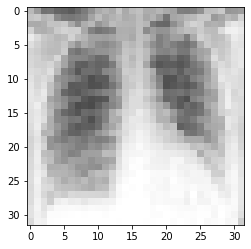

Positive


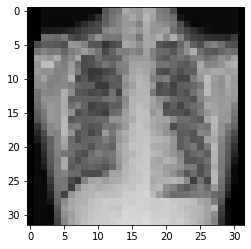

Negative


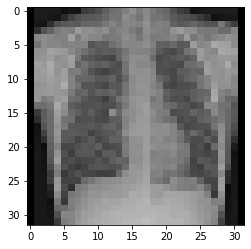

Negative


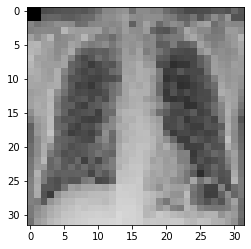

Negative


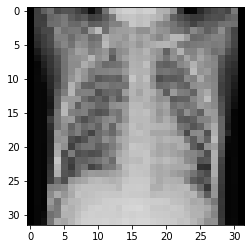

Negative


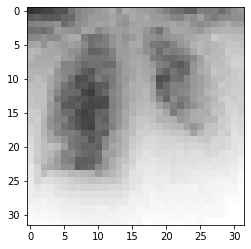

Positive


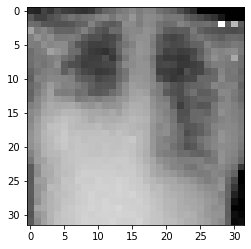

Positive


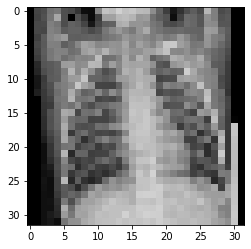

Negative


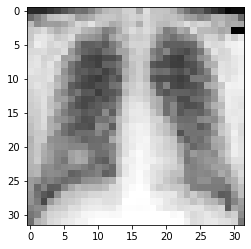

Negative


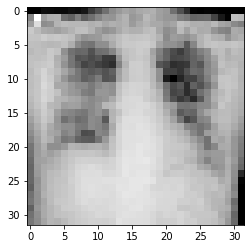

Positive


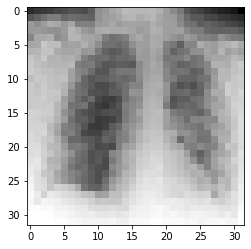

Positive


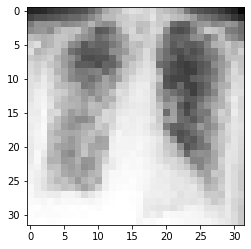

Positive


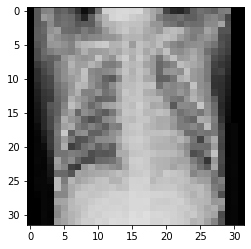

Negative


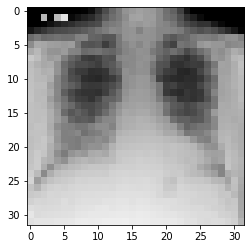

Positive


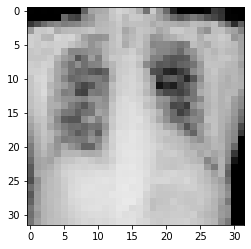

Positive


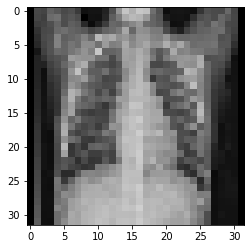

Negative


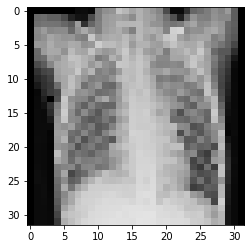

Negative


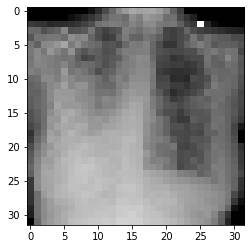

Positive


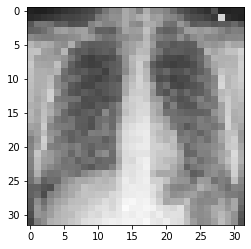

Positive


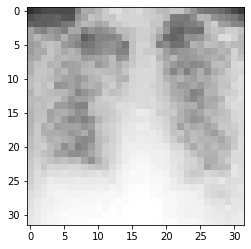

Positive


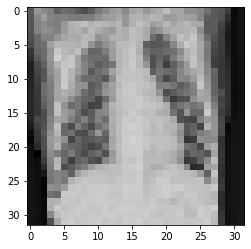

Negative


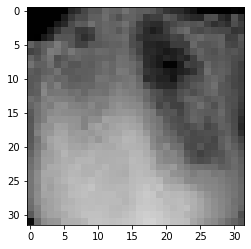

Positive


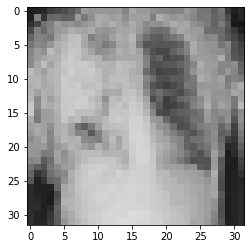

Positive


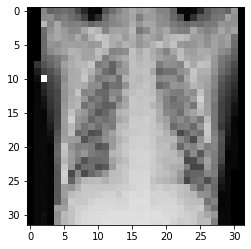

Negative


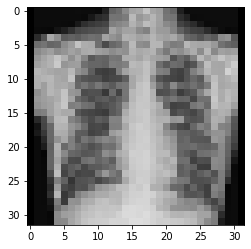

Negative


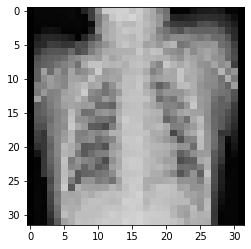

Negative


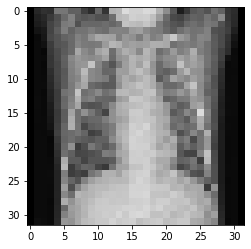

Negative


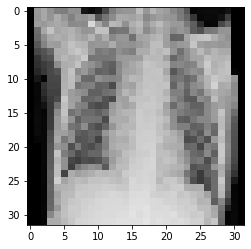

Negative


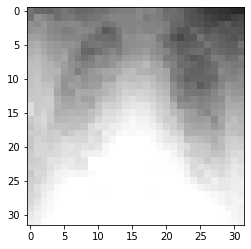

Positive


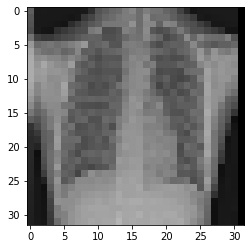

Negative


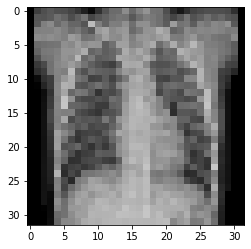

Negative


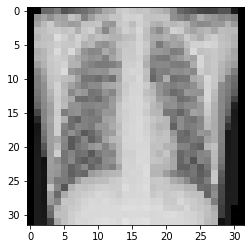

Negative


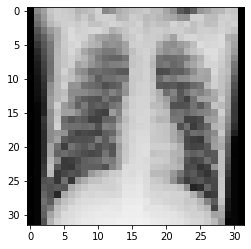

Negative


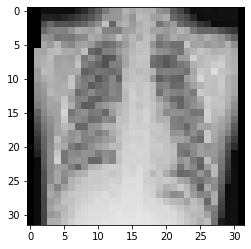

Negative


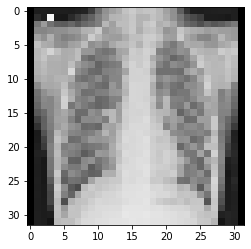

Negative


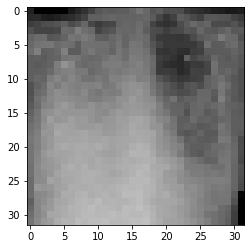

Positive


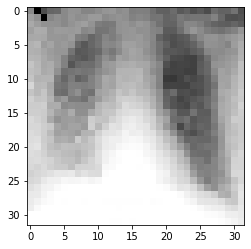

Positive


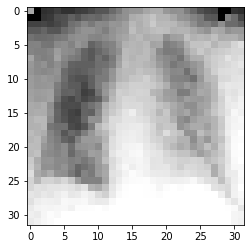

Positive


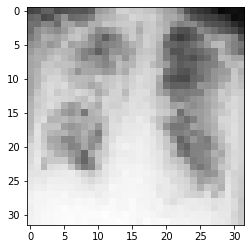

Positive


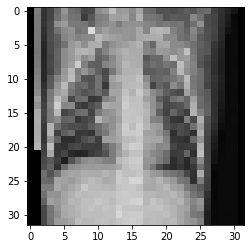

Negative


In [12]:
dir_path = 'val'
for i in os.listdir(dir_path):
    
    img = image.load_img(dir_path+'//'+i,target_size = (32,32))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = c1.predict(images)
    
    if val==0:
        print('Negative')
    else:
        print('Positive')